<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_25_Kmeans_HealthTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Text Clustering (cluster the similar tweets based on similarity of words within the sentences)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Open the tweets file and extract the content line by line and save it in a list

In [ ]:
with open('/content/drive/MyDrive/Health-Tweets/bbchealth.txt') as file:
    contents = file.readlines()

regex = re.compile(r'(?P<tweet_id>.*)\|(?P<date>.*)\|(?P<news>.*)\s?(?P<link>http://.*)')

In [ ]:
#with open('/content/drive/MyDrive/Health-Tweets/cnnhealth.txt') as file:
    #contents2 = file.readlines()
#regex2 = re.compile(r'(?P<tweet_id>.*)\|(?P<date>.*)\|(?P<news>.*)\s?(?P<link>http://.*)')

In [ ]:
re.search(regex, contents[2]).groupdict()

{'date': 'Wed Apr 08 23:30:18 +0000 2015',
 'link': 'http://bbc.in/1ChTANp',
 'news': "Short people's 'heart risk greater' ",
 'tweet_id': '585947807816650752'}

In [ ]:
#re.search(regex2, contents2[0]).groupdict()

Extract data from the list of tweets. Hint: use regular expression for extracting tweet id, tweet 
date, news and link. Convert the extracted contents to dataframe

In [ ]:
df = pd.DataFrame(columns=['tweet_id', 'date', 'news', 'link'])
#df2 = pd.DataFrame(columns=['tweet_id', 'date', 'news', 'link'])


for line in contents:
    line_data = re.search(regex, line).groupdict()
    df = df.append(line_data, ignore_index=True)

In [ ]:
df.head()

,tweet_id,date,news,link
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised,http://bbc.in/1CimpJF
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll,http://bbc.in/1ChTBRv
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater',http://bbc.in/1ChTANp
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising',http://bbc.in/1E6jAjt
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors,http://bbc.in/1CnLwK7


In [ ]:
#df2.head()

Remove the punctations and digits is any from the news 
columns. Then use from nltk.tokenize import word_tokenize to tokenize the sentences in news 
column].

In [ ]:
def normalize(line):
    line = line.lower().strip()
    line = ''.join([char for char in line if char not in string.punctuation+string.digits])
    return word_tokenize(line)

Use from nltk.stem import WordNetLemmatizer. Apply this Lemmatizer to lemmatize the 
words

In [ ]:
def lemmatize_sent(line_tokens):
    return list(map(lemmatizer.lemmatize, line_tokens))

In [ ]:
df['news_tokens'] = df['news'].map(normalize)
df['lemmatized_news_tokens'] = df['news_tokens'].map(lemmatize_sent)

In [ ]:
df.drop(labels=['link'], inplace=True, axis=1)
df.drop(labels=['tweet_id'], inplace=True, axis=1)

In [ ]:
df.head(10)

,date,news,news_tokens,lemmatized_news_tokens
0,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised,"[breast, cancer, risk, test, devised]","[breast, cancer, risk, test, devised]"
1,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll,"[gp, workload, harming, care, bma, poll]","[gp, workload, harming, care, bma, poll]"
2,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater',"[short, peoples, heart, risk, greater]","[short, people, heart, risk, greater]"
3,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising',"[new, approach, against, hiv, promising]","[new, approach, against, hiv, promising]"
4,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors,"[coalition, undermined, nhs, doctors]","[coalition, undermined, nh, doctor]"
5,Wed Apr 08 09:18:39 +0000 2015,Review of case against NHS manager,"[review, of, case, against, nhs, manager]","[review, of, case, against, nh, manager]"
6,Wed Apr 08 09:18:39 +0000 2015,"VIDEO: 'All day is empty, what am I going to d...","[video, all, day, is, empty, what, am, i, goin...","[video, all, day, is, empty, what, am, i, goin..."
7,Wed Apr 08 07:11:58 +0000 2015,VIDEO: 'Overhaul needed' for end-of-life care,"[video, overhaul, needed, for, endoflife, care]","[video, overhaul, needed, for, endoflife, care]"
8,Wed Apr 08 01:51:00 +0000 2015,Care for dying 'needs overhaul',"[care, for, dying, needs, overhaul]","[care, for, dying, need, overhaul]"
9,Tue Apr 07 13:41:42 +0000 2015,VIDEO: NHS: Labour and Tory key policies,"[video, nhs, labour, and, tory, key, policies]","[video, nh, labour, and, tory, key, policy]"


Use TfidVectorizer (from sklearn.feature_extraction.text import TfidfVectorizer), to convert 
the words into vectors

In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['lemmatized_news_tokens'].map(lambda x: ' '.join(x)).tolist())

In [ ]:
tfidf_matrix

<3929x3938 sparse matrix of type '<class 'numpy.float64'>'
	with 22121 stored elements in Compressed Sparse Row format>

Now use kmeans algorithm to cluster these vectors of tweets

In [ ]:
kmeans = KMeans()
kmeans.fit(tfidf_matrix)

KMeans()

 use elbow method to check the appropriate number of clusters. Also you can use 
silhouette_score() to compare cluster quality for different k values. (vary k from 2 to 15)

Text(0.5, 1.0, 'Elbow graph')

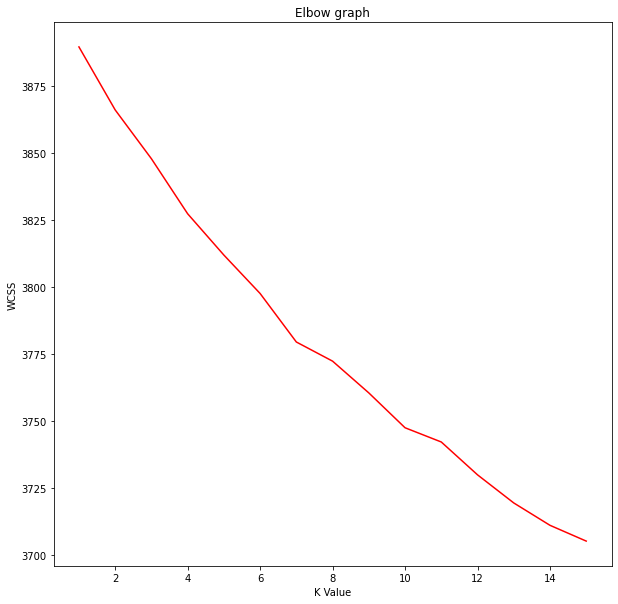

In [ ]:
x, y = [], []
plt.figure(figsize=(10,10))
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_matrix)
    x.append(k)
    y.append(kmeans.inertia_)
    
plt.plot(x, y,color="red")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow graph")

In [ ]:
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    sil_score = silhouette_score(tfidf_matrix, kmeans.labels_)
    print('Number of clusters: {}, Silhoutte Score: {}'.format(k, sil_score))

Number of clusters: 2, Silhoutte Score: 0.003774829794170699
Number of clusters: 3, Silhoutte Score: 0.0055455459719364105
Number of clusters: 4, Silhoutte Score: 0.007124145262229194
Number of clusters: 5, Silhoutte Score: 0.007845815644367954
Number of clusters: 6, Silhoutte Score: 0.009713286860119737
Number of clusters: 7, Silhoutte Score: 0.01036656299581149
Number of clusters: 8, Silhoutte Score: 0.011380446607439601
Number of clusters: 9, Silhoutte Score: 0.01160459000183601
Number of clusters: 10, Silhoutte Score: 0.013829875315800192
Number of clusters: 11, Silhoutte Score: 0.014133670023678966
Number of clusters: 12, Silhoutte Score: 0.013261212586195633
Number of clusters: 13, Silhoutte Score: 0.01500668826937936
Number of clusters: 14, Silhoutte Score: 0.015107302479974142
Number of clusters: 15, Silhoutte Score: 0.015617918314945313
